In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
result_0652011 = pd.read_csv('results/result_0.0650211.csv')['201610']
result_0646523 = pd.read_csv('results/result_0.0646523.csv')['201610']

In [78]:
length = len(result_0652011)

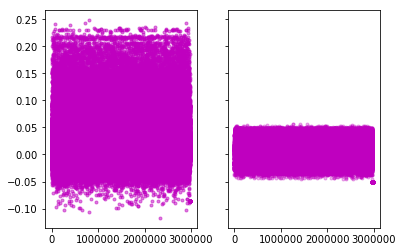

In [80]:
plt.close()
plt.figure(figsize=(32, 12))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(range(length), result_0652011, '.', color='m', alpha=0.3)
ax2.plot(range(length), result_0646523, '.', color='m', alpha=0.3)
plt.show()

In [83]:
print("Mean:", result_0646523.mean())
print("Mean:", result_0652011.mean())

Mean: 0.011838260472981288
Mean: 0.014331072023335936


In [40]:
y_pred.shape

(2985217,)

# Artificial result

In [96]:
result_0646523 = pd.read_csv('results/result_0.0646523.csv')

In [98]:
mean_value = 0.0118

In [67]:
lower_quan = y_pred.quantile(0.00001)
lower_quan

-0.08885873304367066

In [57]:
upper_quan = y_pred.quantile(0.9999)
upper_quan

0.2141664028167725

In [99]:
y_pred[:10]

0   -0.012167
1   -0.022837
2    0.042622
3    0.022563
4   -0.015114
5    0.000043
6   -0.022314
7   -0.004850
8   -0.015100
9   -0.006134
Name: 201610, dtype: float64

In [100]:
y_art = 0.5*y_pred + 0.5*mean_value

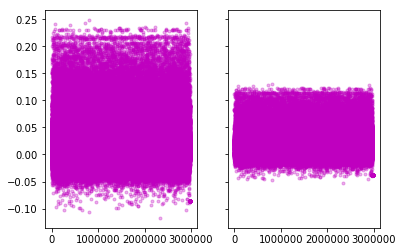

In [102]:
plt.close()
plt.figure(figsize=(4, 6))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(range(len(y_pred)), y_pred, '.', color='m', alpha=0.3)
ax2.plot(range(len(y_pred)), y_art, '.', color='m', alpha=0.3)
plt.show()

In [101]:
sub = pd.read_csv('sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = y_art

sub.to_csv('result.csv', index=False, float_format='%.8f')